In [ ]:
import torch
import pandas as pd
from typing import List
import matplotlib.pyplot as plt

In [4]:
t1 = torch.tensor([1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]).double()
t2 = torch.tensor([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]).double()
t3 = torch.rand(len(t1)).double() - 0.5

sig = torch.sigmoid(t3).double()
p = (sig>0.5).double()
print(p)

tensor([0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.],
       dtype=torch.float64)


In [5]:
def display_tensors_together(t1,t2,t3):
    t1_df = pd.Series(t1,name='t1').astype('int')
#     t2_df = pd.DataFrame(t2,columns=['t2']).astype('float')
    t2_df = pd.Series(t2,name='t2').astype('double')
    display(t1_df)
    display(t2_df)
    t3_df = pd.concat([t1_df,t2_df],axis=1)
    display(t3_df)
    all = torch.cat([t1,t2,t3],dim=0).reshape(3,len(t1)).T
    all_df = pd.DataFrame(all).astype("float")
    return all_df

#all = torch.cat([t1.double(),t2.double(),t3.double()],dim=0)

def tensors_to_dataframe(tensors:List):
    list_of_series_from_tensors = []
    for tensor,column_name,tensor_type in tensors:
        series = pd.Series(tensor,name=column_name).astype(tensor_type)
        list_of_series_from_tensors.append(series)
    full_df = pd.concat(list_of_series_from_tensors,axis=1)
    return full_df


display_df = tensors_to_dataframe([[t1,'Target','int'],[t2,'Pred','int'],[t3,'Output','float']])
display(display_df)


,Target,Pred,Output
0,1,1,-0.481753
1,0,0,-0.483558
2,0,0,0.124694
3,0,1,0.055727
4,1,0,0.134624
5,0,0,-0.442182
6,0,0,-0.153756
7,1,1,-0.346748
8,0,0,0.308965
9,1,0,-0.497331


In [6]:
def tensors_to_dataframe(tensors:List):
    # Each element in list is a triplet: tensor,column_name,tensor_type
    list_of_series_from_tensors = []
    for tensor,column_name,tensor_type in tensors:
        series = pd.Series(tensor.detach().cpu().numpy(),name=column_name).astype(tensor_type)
        list_of_series_from_tensors.append(series)
    full_df = pd.concat(list_of_series_from_tensors,axis=1)
    return full_df

def convert_target_and_prediction_to_list_of_values_dict(df,output_column_name):
    compared_results_columns = ['Label','Prediction']
#     print("df=")
#     print(df)
    compared_results_values = df[compared_results_columns].drop_duplicates()
#     print("compared_results_values=",compared_results_values)
    grouped = df.groupby(compared_results_columns)
    values_by_index_as_list = grouped.agg({output_column_name:lambda x:list(x)})
#     print("values_by_index_as_list=",values_by_index_as_list)
    results_index = values_by_index_as_list.index.values
#     print("results_index=",results_index)
    new_results_index = [f't:{t}_p:{p}' for t,p in results_index]
    values_by_index_as_list.index = new_results_index
    return values_by_index_as_list[output_column_name].to_dict()

    
def update_sigmoid_value_dct(current,update):
    for update_key, update_list in update.items():
        if current.get(update_key,[]) is None:
            print("Got none, update_key=",update_key," current=", current)
        current[update_key] =  current.get(update_key,[]) + update_list
    return current


In [ ]:
sigmoid_values_by_result_per_epoch = []

for epoch in range(0,10):
    sigmoid_values_by_result_dct = {}
    for batch in range(0,3):
        outputs = 10*(torch.rand(len(t1)).double() - 0.5)
        sigmoid_outputs = torch.sigmoid(outputs).double()
#         print(sorted(sigmoid_outputs.tolist()))
        preds = (sig>0.5).double()
        sample_results = tensors_to_dataframe([
                    [t1,'Label','int'],[t2,'Output','float'],
                    [sigmoid_outputs,'Sigmoid','float'],[preds,'Prediction','int']])
        values_by_index_as_lists_dct = convert_target_and_prediction_to_list_of_values_dict(sample_results,'Sigmoid')
        sigmoid_values_by_result_dct = update_sigmoid_value_dct(sigmoid_values_by_result_dct,values_by_index_as_lists_dct)
#         print("sigmoid_values_by_result_dct=",sigmoid_values_by_result_dct)
        print(f'Epoch: {epoch}, batch: {batch}')
        for k,v in sigmoid_values_by_result_dct.items():
            print(f'key={k}, length={len(v)}')
    #Back to epoch
    for i,key in enumerate(sigmoid_values_by_result_dct.keys()):
        plt.subplot(epoch,i,i)
        plt.hist(sigmoid_values_by_result_dct[key])
        plt.show()
        
        
        

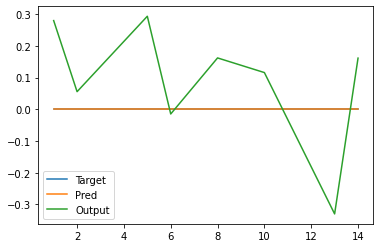

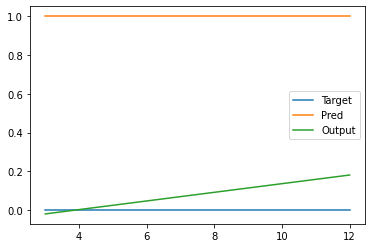

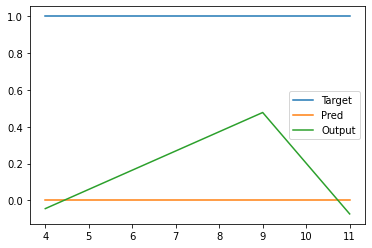

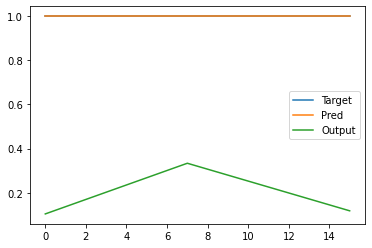

In [33]:
g = display_df.groupby(by=['Target','Pred'])
g_list = g.agg({'Output':lambda x:list(x)})

# a = g.loc[(0,0),'Output']
# plt.hist(values, num_bins)

for name, group in g:
    group.plot()

Output    [-0.336847722530365, 0.03412175178527832, 0.02...
Name: (0, 0), dtype: object